In [2]:
#加载数据集
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
#准备数据集------具体就是将数据转为张量的形式

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    #这里是创建了一个与输入列表相同规格的np矩阵， enumerate取代了传统的两层for循环
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
#模型定义---------构建网络，2层hiddenlayer,1层outputlayer
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
#编译模型
model.compile(optimizer='rmsprop',
             loss="binary_crossentropy",
             metrics=['accuracy'])

In [24]:
#划分训练集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.4923 - accuracy: 0.7821 - val_loss: 0.3811 - val_accuracy: 0.8567
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.2898 - accuracy: 0.9070 - val_loss: 0.3305 - val_accuracy: 0.8676
Epoch 3/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2129 - accuracy: 0.9292 - val_loss: 0.3301 - val_accuracy: 0.8638
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1687 - accuracy: 0.9455 - val_loss: 0.2730 - val_accuracy: 0.8914
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1407 - accuracy: 0.9546 - val_loss: 0.2836 - val_accuracy: 0.8878
Epoch 6/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1114 - accuracy: 0.9657 - val_loss: 0.3444 - val_accuracy: 0.8734
Epoch 7/20
15000/15000 [==============================] - 1s 92us/s

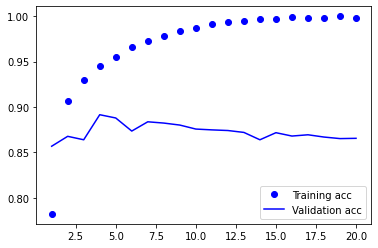

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.legend()
plt.show()